In [58]:
import pandas as pd
import numpy as np

### Functions to generate cognitive & limbic blocks

In [59]:
def create_localizer_block_single_effector(n_trials, response_modality='eye', 
                                           block_number=None, pseudorandomize=True, add_timing=True):
    
    trial_types = np.repeat([0, 1], repeats=n_trials/2)  # left/right is correct
    
    # Initialize arrays
    cue_by_trial = np.zeros(n_trials, dtype='<U5')
    correct_answers = np.zeros(n_trials, dtype=np.int8)

    # Define the cues for every trial
    cue_by_trial[(trial_types == 0) | (trial_types == 1)] = response_modality.upper()

    # Define the responses ('correct answers')/directions for every trial
    correct_answers[(trial_types == 0)] = 0  # 0 = respond LEFT
    correct_answers[(trial_types == 1)] = 1  # 1 = respond RIGHT
    
    # Create dataframe for eas ier handling
    trial_data = pd.DataFrame({'correct_answer': correct_answers,
                               'cue': cue_by_trial,
                               'trial_type': trial_types})
    
    # Should we pseudorandomize?
    if pseudorandomize:
        trial_data = pseudorandomize_trials(trial_data, columns=['correct_answer'])
    
    # Add block number for completeness
    if block_number is not None:
        trial_data['block'] = block_number
        trial_data['block_type'] = 'localizer'

    if add_timing:
        trial_data = get_block_timing(trial_data, phase_2=1, phase_6=0)
    
    trial_data['response_modality'] = trial_data['cue'].str.lower()
    
    return trial_data

In [60]:
def create_localizer_block(n_trials, block_number=None, response_modality=None, add_timing=True, pseudorandomize=True):
    
    trial_types = np.hstack((np.repeat([0, 1], repeats=n_trials/4),   # Eye cue, left/right
                             np.repeat([2, 3], repeats=n_trials/4)))  # Hand cue, left/right
    
    # Initialize arrays
    cue_by_trial = np.zeros(n_trials, dtype='<U5')
    correct_answers = np.zeros(n_trials, dtype=np.int8)

    # Define the cues for every trial
    cue_by_trial[(trial_types == 0) | (trial_types == 1)] = 'EYE'
    cue_by_trial[(trial_types == 2) | (trial_types == 3)] = 'HAND'

    # Define the responses ('correct answers')/directions for every trial
    correct_answers[(trial_types == 0) | (trial_types == 2)] = 0  # 0 = respond LEFT
    correct_answers[(trial_types == 1) | (trial_types == 3)] = 1  # 1 = respond RIGHT
    
    # Create dataframe for eas ier handling
    trial_data = pd.DataFrame({'correct_answer': correct_answers,
                               'cue': cue_by_trial,
                               'trial_type': trial_types})
    
    # Should we pseudorandomize?
    if pseudorandomize:
        trial_data = pseudorandomize_trials(trial_data)
    
    # Add block number for completeness
    if block_number is not None:
        trial_data['block'] = block_number
        trial_data['block_type'] = 'localizer'

    if add_timing:
        trial_data = get_block_timing(trial_data, phase_2=1, phase_6=0)
    
    trial_data['response_modality'] = trial_data['cue'].str.lower()
    
    return trial_data

In [61]:
def create_cognitive_block(n_trials, block_number=None, response_modality=None, add_timing=True, pseudorandomize=True):
    
    trial_types = np.hstack((np.repeat([0, 1], repeats=n_trials / 4),   # SPEED cue, left/right corr
                             np.repeat([2, 3], repeats=n_trials / 4)))  # ACCURACY cue, left/right corr

    if trial_types.shape[0] != n_trials:
        raise(ValueError('The provided n_trials (%d) could not be split into the correct number of trial types. '
                         'Closest option is %d trials' % (n_trials, trial_types.shape[0])))

    cue_by_trial = np.zeros(n_trials, dtype='<U5')
    correct_answers = np.zeros(n_trials, dtype=np.int8)

    cue_by_trial[(trial_types == 0) | (trial_types == 1)] = 'SPD'
    cue_by_trial[(trial_types == 2) | (trial_types == 3)] = 'ACC'

    correct_answers[(trial_types == 0) | (trial_types == 2)] = 0  # 0 = left is correct
    correct_answers[(trial_types == 1) | (trial_types == 3)] = 1  # 1 = right is correct

    # Create dataframe for easier handling
    trial_data = pd.DataFrame({'correct_answer': correct_answers,
                               'cue': cue_by_trial,
                               'trial_type': trial_types})
        
    if pseudorandomize:
        trial_data = pseudorandomize_trials(trial_data)
    
    if block_number is not None:
        trial_data['block'] = block_number
        
    if response_modality is not None:
        trial_data['response_modality'] = response_modality
        trial_data['block_type'] = 'cognitive_%s' % response_modality 

    if add_timing:
        trial_data = get_block_timing(trial_data)
        
    return trial_data

In [62]:
def create_limbic_block(n_trials, subject_number=1, block_number=None, response_modality=None, add_timing=True, pseudorandomize=True):
    
    trial_types = np.hstack((np.repeat([0, 1], repeats=n_trials/6),    # Neutral cue, left/right corr
                             np.repeat([2, 3], repeats=n_trials/6),    # Left cue, left/right corr
                             np.repeat([4, 5], repeats=n_trials/6)))   # Right cue, left/right corr
#    np.random.shuffle(trial_types)

    if trial_types.shape[0] != n_trials:
        raise(ValueError('The provided n_trials (%d) could not be split into the correct number of trial types. '
                     'Closest option is %d trials' % (n_trials, trial_types.shape[0])))

    cue_by_trial = np.zeros(n_trials, dtype='<U5')
    correct_answers = np.zeros(n_trials, dtype=np.int8)

    cue_by_trial[(trial_types == 0) | (trial_types == 1)] = 'NEU'
    cue_by_trial[(trial_types == 2) | (trial_types == 3)] = 'LEFT'
    cue_by_trial[(trial_types == 4) | (trial_types == 5)] = 'RIGHT'

    correct_answers[(trial_types == 0) |
                    (trial_types == 2) |
                    (trial_types == 4)] = 0  # 0 = left is correct
    correct_answers[(trial_types == 1) |
                    (trial_types == 3) |
                    (trial_types == 5)] = 1  # 1 = right is correct

    # Create dataframe for easier handling
    trial_data = pd.DataFrame({'correct_answer': correct_answers,
                               'cue': cue_by_trial,
                               'trial_type': trial_types})

    if pseudorandomize:
        trial_data = pseudorandomize_trials(trial_data)

    if block_number is not None:
        trial_data['block'] = block_number
        
    if response_modality is not None:
        trial_data['response_modality'] = response_modality
        trial_data['block_type'] = 'limbic_%s' % response_modality 

    if add_timing:
        trial_data = get_block_timing(trial_data)

    return trial_data

### Function that creates timing columns for a block

In [63]:
def get_block_timing(trial_data, phase_0=None, phase_1=None, phase_2=None, phase_3=None, phase_4=None, phase_5=None, phase_6=None):
    
    if phase_0 is None:
        trial_data['phase_0'] = 0  # Wait for scanner pulse
    else:
        trial_data['phase_0'] = phase_0
        
    if phase_1 is None:
        trial_data['phase_1'] = np.random.choice([0, .5, 1, 1.5], size=trial_data.shape[0])  # Fixation cross pre-cue
    else:
        trial_data['phase_1'] = phase_1
    
    if phase_2 is None:
        trial_data['phase_2'] = 4.8
    else:
        trial_data['phase_2'] = phase_2
    
    if phase_3 is None:
        trial_data['phase_3'] = np.random.choice([0, .5, 1, 1.5], size=trial_data.shape[0])  # Fixation cross post-cue
    else:
        trial_data['phase_3'] = phase_3

    if phase_4 is None:
        trial_data['phase_4'] = 1.5  # Stimulus
    else:
        trial_data['phase_4'] = phase_4

    if phase_5 is None:
        trial_data['phase_5'] = 0  # Fill time:  in the experiment code, phase 4 ends when a response is given. There is a 'fill time' phase 5 to ensure all stimulus durations are equal
    else:
        trial_data['phase_5'] = phase_5

    if phase_6 is None:
        trial_data['phase_6'] = 0.35  # Feedback
    else:
        trial_data['phase_6'] = phase_6

    # Calculate duration of individual phases of trial
    trial_data['trial_duration'] = trial_data[['phase_' + str(x) for x in range(7)]].sum(axis=1)

    # Find trials with total time < 8 seconds
    idx = trial_data['trial_duration'] <= 8
    trial_data.loc[idx, 'phase_7'] = 8 - trial_data.loc[idx, 'trial_duration']
    trial_data.loc[~idx, 'phase_7'] = 10 - trial_data.loc[~idx, 'trial_duration']

    # Include ITI in trial duration
    trial_data['trial_duration'] = trial_data[['phase_' + str(x) for x in range(8)]].sum(axis=1)

    # Add trial start times relative to start of block
    trial_data['trial_start_time_block'] = trial_data['trial_duration'].shift(1).cumsum()
    trial_data.loc[0, 'trial_start_time_block'] = 0

    # Add cue onset times relative to start of block
    trial_data['cue_onset_time_block'] = trial_data['trial_start_time_block'] + \
                                         trial_data['phase_1']
    # Add stimulus onset times relative to start of block
    trial_data['stimulus_onset_time_block'] = trial_data['trial_start_time_block'] + \
                                              trial_data['phase_1'] + \
                                              trial_data['phase_2'] + \
                                              trial_data['phase_3']
    return trial_data

### Function for pseudorandomization

In [64]:
def pseudorandomize_trials(trial_data, max_identical_iters=4, columns=['cue', 'correct_answer'], debug=True):
    """
    Pseudorandomizes: makes sure that it is not possible to have more than x iterations for every type of column, specified in columns.
    """
    # Start by shuffling
    trial_data = trial_data.sample(frac=1, random_state=np.random.randint(0, 1e7, dtype='int')).reset_index(drop=True) 
    
    max_iters = max_identical_iters + 1  # Maximum iterations that are allowed to be the same is 4. Therefore, only change something if *5* rows in a row are identical.
    outer_while_i = 0
    debug_print_after_i = 100
    
    good_set = False
    while not good_set:
        outer_while_i += 1
        
        reshuffle = False  # Assume the dataset does not need reshuffling.
        for row_n in range(max_iters-1, trial_data.shape[0]):
            
            # Select rows [max_iter-1 - row_n] we're going to check
            this_loop_row_ix = [x for x in np.arange(row_n, row_n-max_iters, -1)]
            
            # Check if the current row, and the (max_iters-1) rows before, are the same value (number of unique values = 1).
            # If so, then move the current row number to the bottom of the dataframe. However, we need to re-check the same four rows again
            # after moving a row to the bottom: therefore, a while loop is necessary.
            checked_row = False
            n_attempts_at_moving = 0
            inner_while_i = 0
            while not checked_row:
                inner_while_i += 1
                
                if debug and inner_while_i > debug_print_after_i:
                    print('New inner loop started for this row!')
                
                if (trial_data.iloc[this_loop_row_ix][columns].nunique().values == 1).any():

                    if debug and inner_while_i > debug_print_after_i:
                        print('Found four consecutively identical rows.')
                    
                    # If there are too many consecutively identical rows at the bottom of the dataframe, 
                    # break and start over/shuffle
                    if row_n >= (trial_data.shape[0]-max_iters):
                        if debug and inner_while_i > debug_print_after_i:
                            print('These occurred at row_n %d, which is at the bottom of the DF.' % row_n)
                        
                        checked_row = True
                        reshuffle = True
                    
                    # Too many consecutive identical rows? Move row_n to the bottom, and check again with the new row_n.
                    else:
                        if debug and inner_while_i > debug_print_after_i:
                            print('These occurred at row_n %d. Checking the remainder of the DF.' % row_n)
                        
                        # Check if moving to the bottom even makes sense: if all remaining values are identical, it doesn't.
                        if (trial_data.iloc[row_n:][columns].nunique().values < 2).any():
                            if debug and inner_while_i > debug_print_after_i:
                                print('All remaining values are identical. I should stop the for-loop, and start over.')
                            
                            checked_row = True
                            reshuffle = True
                        else:
                            if n_attempts_at_moving < 50:
                                n_attempts_at_moving += 1
                                
                                if debug and inner_while_i > debug_print_after_i:
                                    print('Not all remaining values are identical. I should move the final part to the bottom.')
                                
                                # If not, move the current row to the bottom
                                row_to_move = trial_data.iloc[row_n,:]

                                # Delete row from df
                                trial_data.drop(row_n, axis=0, inplace=True)

                                # Append original row to end. Make sure to reset index
                                trial_data = trial_data.append(row_to_move).reset_index(drop=True)
                            
                            # If we already tried moving the current row to the bottom for 50 times, let's forget about it and restart
                            else:
                                checked_row = True
                                reshuffle = True
                else:
                    if debug and inner_while_i > debug_print_after_i:
                        print('Checked row, but the row is fine. Next row.')
                    checked_row = True
                        
            if reshuffle:
                good_set = False
                break  # out of the for loop
            
            # Reached the bottom of the dataframe, but no reshuffle call? Then we're set.
            if row_n == trial_data.shape[0]-1:
                good_set = True

        if reshuffle:
            # Shuffle, reset index to ensure trial_data.drop(row_n) rows
            trial_data = trial_data.sample(frac=1, random_state=np.random.randint(0, 1e7, dtype='int')).reset_index(drop=True) 

    return trial_data
    

## Order of blocks by participant

- X = localizer hand
- Y = localizer eye
- A = cognitive, hand
- B = cognitive, eye
- C = limbic, hand
- D = limbic, eye

4 blocks, 4\*3\*2\*1 = 4! = 24 block orders

In [65]:
import itertools
from pprint import pprint

# Use itertools permutations to get all possible orders of both blocks and localizers
block_order = list(itertools.permutations("ABCD"))
loc_order = list(itertools.permutations("XY"))

# Repeat all elements in loc_orders to match sizes
loc_order = [item for item in loc_order for i in range(len(block_order))]

# Merge localizer and blocks
block_order = [(x[0], x[1], y[0], y[1], y[2], y[3]) for x, y in zip(loc_order, block_order*2)]
pprint(block_order)
len(block_order)  # 48 possible conditions!

[('X', 'Y', 'A', 'B', 'C', 'D'),
 ('X', 'Y', 'A', 'B', 'D', 'C'),
 ('X', 'Y', 'A', 'C', 'B', 'D'),
 ('X', 'Y', 'A', 'C', 'D', 'B'),
 ('X', 'Y', 'A', 'D', 'B', 'C'),
 ('X', 'Y', 'A', 'D', 'C', 'B'),
 ('X', 'Y', 'B', 'A', 'C', 'D'),
 ('X', 'Y', 'B', 'A', 'D', 'C'),
 ('X', 'Y', 'B', 'C', 'A', 'D'),
 ('X', 'Y', 'B', 'C', 'D', 'A'),
 ('X', 'Y', 'B', 'D', 'A', 'C'),
 ('X', 'Y', 'B', 'D', 'C', 'A'),
 ('X', 'Y', 'C', 'A', 'B', 'D'),
 ('X', 'Y', 'C', 'A', 'D', 'B'),
 ('X', 'Y', 'C', 'B', 'A', 'D'),
 ('X', 'Y', 'C', 'B', 'D', 'A'),
 ('X', 'Y', 'C', 'D', 'A', 'B'),
 ('X', 'Y', 'C', 'D', 'B', 'A'),
 ('X', 'Y', 'D', 'A', 'B', 'C'),
 ('X', 'Y', 'D', 'A', 'C', 'B'),
 ('X', 'Y', 'D', 'B', 'A', 'C'),
 ('X', 'Y', 'D', 'B', 'C', 'A'),
 ('X', 'Y', 'D', 'C', 'A', 'B'),
 ('X', 'Y', 'D', 'C', 'B', 'A'),
 ('Y', 'X', 'A', 'B', 'C', 'D'),
 ('Y', 'X', 'A', 'B', 'D', 'C'),
 ('Y', 'X', 'A', 'C', 'B', 'D'),
 ('Y', 'X', 'A', 'C', 'D', 'B'),
 ('Y', 'X', 'A', 'D', 'B', 'C'),
 ('Y', 'X', 'A', 'D', 'C', 'B'),
 ('Y', 'X'

48

## Loop over participant numbers to generate the correct blocks in order, and save

In [103]:
n_trials_localizer = 20
n_trials_blocks = 120
n_participants = 48

for pp in range(1, n_participants+1):
    pp_str = str(pp).zfill(3)
    block_order_this_pp = block_order[pp % len(block_order)]
    
    # Empty DataFrame
    design_this_pp = pd.DataFrame()
    
    # Get decision-making blocks
    for block_number, block_char in enumerate(block_order_this_pp):
        if block_char == 'X':
            block_data = create_localizer_block_single_effector(n_trials=n_trials_localizer/2, 
                                                                response_modality='hand',
                                                                block_number=0,
                                                                pseudorandomize=True)
        elif block_char == 'Y':
            block_data = create_localizer_block_single_effector(n_trials=n_trials_localizer/2, 
                                                                response_modality='eye',
                                                                block_number=0,
                                                                pseudorandomize=True)
        elif block_char == 'A':
            block_data = create_cognitive_block(n_trials=n_trials_blocks, block_number=block_number-1, response_modality='hand')
        elif block_char == 'B':
            block_data = create_cognitive_block(n_trials=n_trials_blocks, block_number=block_number-1, response_modality='eye')
        elif block_char == 'C':
            block_data = create_limbic_block(n_trials=n_trials_blocks, block_number=block_number-1, response_modality='hand')
        elif block_char == 'D':
            block_data = create_limbic_block(n_trials=n_trials_blocks, block_number=block_number-1, response_modality='eye')
        
        design_this_pp = design_this_pp.append(block_data)

    # Set indices
    design_this_pp.index.name = 'block_trial_ID'
    design_this_pp.reset_index(inplace=True)
    design_this_pp.index.name = 'trial_ID'
    
    # Add trial start times (relative to start of experiment)
    design_this_pp['trial_start_time'] = design_this_pp['trial_duration'].shift(1).cumsum()
    design_this_pp.loc[0, 'trial_start_time'] = 0

    # Add cue onset times (relative to start of experiment)
    design_this_pp['cue_onset_time'] = design_this_pp['trial_start_time'] + \
                                       design_this_pp['phase_1']

    # Add stimulus onset times (relative to start of experiment)
    design_this_pp['stimulus_onset_time'] = design_this_pp['trial_start_time'] + \
                                            design_this_pp['phase_1'] + \
                                            design_this_pp['phase_2'] + \
                                            design_this_pp['phase_3']
    
    # Re-order column order for nicety
    design_this_pp = design_this_pp[['block_trial_ID', 'block', 'block_type', 'correct_answer', 'cue', 'response_modality', 'trial_type', 
                                     'phase_0', 'phase_1', 'phase_2', 'phase_3', 'phase_4', 'phase_5', 'phase_6', 'phase_7', 'trial_duration', 
                                     'trial_start_time', 'cue_onset_time', 'stimulus_onset_time',
                                     'trial_start_time_block', 'cue_onset_time_block', 'stimulus_onset_time_block']]
    
    # Save full data
    design_this_pp.to_csv('pp_%s_trial_types_full.csv' % pp_str, index=True)
    
    # Save individual blocks
    for block_num, block_type in zip(design_this_pp['block'].unique(), design_this_pp['block_type'].unique()):
        block = design_this_pp.loc[design_this_pp['block'] == block_num]
        block.to_csv('pp_%s_block_%d_type_%s.csv' % (pp_str, block_num, block_type), index=True)

New inner loop started for this row!
Found four consecutively identical rows.
These occurred at row_n 113. Checking the remainder of the DF.
Not all remaining values are identical. I should move the final part to the bottom.
New inner loop started for this row!
Found four consecutively identical rows.
These occurred at row_n 113. Checking the remainder of the DF.
Not all remaining values are identical. I should move the final part to the bottom.
New inner loop started for this row!
Found four consecutively identical rows.
These occurred at row_n 113. Checking the remainder of the DF.
Not all remaining values are identical. I should move the final part to the bottom.
New inner loop started for this row!
Found four consecutively identical rows.
These occurred at row_n 113. Checking the remainder of the DF.
Not all remaining values are identical. I should move the final part to the bottom.
New inner loop started for this row!
Found four consecutively identical rows.
These occurred at row_

## Visualizing the design

In [137]:
import numpy as np
import pandas as pd
import nipy
from nipy.modalities.fmri import hrf, utils
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr     # has classes for tick-locating and -formatting
%matplotlib inline

def numfmt(x, pos): # your custom formatter function: divide by 100.0
    s = '{}'.format(x / 10.0)
    return s

In [25]:
# Load design, select only the necessary columns
stim_info = pd.read_csv('pp_001_trial_types_full.csv')
stim_info = stim_info[['correct_answer', 'trial_type', 'block', 'phase_2', 'phase_4', 'cue', 'cue_onset_time', 'stimulus_onset_time']]

# Select a single block
#stim_info = stim_info[stim_info['block']==3]
stim_info.head()

,correct_answer,trial_type,block,phase_2,phase_4,cue,cue_onset_time,stimulus_onset_time
0,1,1,0,1.0,1.5,HAND,1.5,3.5
1,0,0,0,1.0,1.5,HAND,8.0,10.5
2,0,0,0,1.0,1.5,HAND,16.0,17.0
3,0,0,0,1.0,1.5,HAND,24.0,25.5
4,1,1,0,1.0,1.5,HAND,33.0,34.5


### Model BOLD-response using glover
function taken from nipy

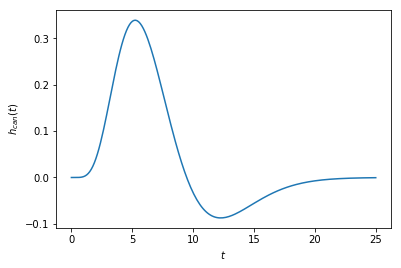

In [69]:
# hrf.glover is a symbolic function; get a function of time to work on arrays
hrf_func = utils.lambdify_t(hrf.glover(utils.T))

t = np.linspace(0,25,200)
plt.plot(t, hrf_func(t))
a=plt.gca()
a.set_xlabel(r'$t$')
a.set_ylabel(r'$h_{can}(t)$')

## Create vectors to use for convolving the HRF: cue_vec and stim_vec
We're calculating in "deciseconds" (1/10s) time space

## Plot design in a loop for every pp

In [85]:
def stim_to_design(pp_design):
    
    # hrf.glover is a symbolic function; get a function of time to work on arrays
    hrf_func = utils.lambdify_t(hrf.glover(utils.T))
    
    n_conditions = len(np.unique(pp_design['cue']))
    max_time = np.ceil((pp_design['stimulus_onset_time'].max()+25)*10)

    # 14 types of stimuli
    stim_vec = np.zeros(shape=(int(max_time), 14))
    stim_names = []
    
    # Get stimulus onsets and durations
    i = -1
    for stim_type in pp_design['correct_answer'].unique():
        for cue_type in pp_design['cue'].unique():
            i += 1
            stim_names.append('stimulus_' + str(stim_type) + '_' + cue_type)
            stim_onsets = pp_design.loc[(pp_design['correct_answer'] == stim_type) &
                                        (pp_design['cue'] == cue_type), 'stimulus_onset_time']*10
            stim_durations = pp_design['phase_4']*10
            for onset, duration in zip(stim_onsets, stim_durations):
                stim_vec[np.arange(onset, onset+duration, dtype='int'), i] = 1

#     stim_onsets = pp_design['stimulus_onset_time'].values*10
#     stim_durations = pp_design['phase_4'].values*10
#     for onset, duration in zip(stim_onsets, stim_durations):
#         stim_vec[np.arange(onset, onset+duration, dtype='int'), 0] = 1
    
    # Get cue onsets by cue type
    cue_names = []
    cue_vec = np.zeros(shape=(int(max_time), n_conditions))  # A column per cue type condition
    for i, condition in enumerate(stim_info['cue'].unique()):
        cue_names.append('cue_' + condition)
        # Find cue onsets
        onsets = pp_design.loc[pp_design['cue'] == condition, 'cue_onset_time'].values*10
        durations = pp_design.loc[pp_design['cue'] == condition, 'phase_2'].values*10
        for onset, duration in zip(onsets, durations):
            cue_vec[np.arange(onset, onset+duration, dtype='int'), i] = 1
    
    # Combine everything in a single array
    ev_vec = np.hstack((cue_vec, stim_vec))
    ev_names = cue_names + stim_names
            
    # Create hrf to convolve with
    hrf_full = hrf_func(np.linspace(0, stop=int(max_time/10), num=int(max_time)))

    # Pre-allocate output. This will be an n_timepoints x n_conditions+1 matrix.
    X = np.empty(shape=(int(max_time), ev_vec.shape[1]))

    # Convolve everything: the stimulus first, the cues afterwards.
    for i, ev_name in enumerate(ev_names):
        print('Convolving %s...' % ev_name)
        X[:, i] = np.convolve(hrf_full, ev_vec[:, i])[:int(max_time)]
            
    return X, ev_names

In [105]:
def plot_participant_design(pp_design, pp_num):

    X, ev_names = stim_to_design(pp_design)
    n_evs = len(ev_names)

    yfmt = tkr.FuncFormatter(numfmt)    # create custom formatter function (re-format y-axis for seconds instead of 1/10th secs)

    # Plot
    X_plot = X/np.max(X)
    f = plt.figure(figsize=(10, 40))
    for plot in range(n_evs):
        plt.plot(X_plot[:, plot] + plot, np.arange(X.shape[0]))
    
    # Set y-axis
    plt.ylabel('Time (s)')
    plt.ylim((pp_design['cue_onset_time'].min()*10, X.shape[0]))
    ax = plt.gca()
    ax.invert_yaxis()
    ax.yaxis.set_major_formatter(yfmt)
    
    # Set x-axis
    plt.xticks(np.arange(len(ev_names)), ev_names, rotation=70)
    ax.xaxis.tick_top()

    f.set_size_inches(10, 40)
    plt.savefig('pp_%s_design.png' % str(pp_num).zfill(3))

In [91]:
X, ev_names = stim_to_design(stim_info)
X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))  # Add column of ones to design matrix? for 'event' in general/baseline?

Convolving cue_HAND...
Convolving cue_EYE...
Convolving cue_ACC...
Convolving cue_SPD...
Convolving cue_LEFT...
Convolving cue_NEU...
Convolving cue_RIGHT...
Convolving stimulus_1_HAND...
Convolving stimulus_1_EYE...
Convolving stimulus_1_ACC...
Convolving stimulus_1_SPD...
Convolving stimulus_1_LEFT...
Convolving stimulus_1_NEU...
Convolving stimulus_1_RIGHT...
Convolving stimulus_0_HAND...
Convolving stimulus_0_EYE...
Convolving stimulus_0_ACC...
Convolving stimulus_0_SPD...
Convolving stimulus_0_LEFT...
Convolving stimulus_0_NEU...
Convolving stimulus_0_RIGHT...


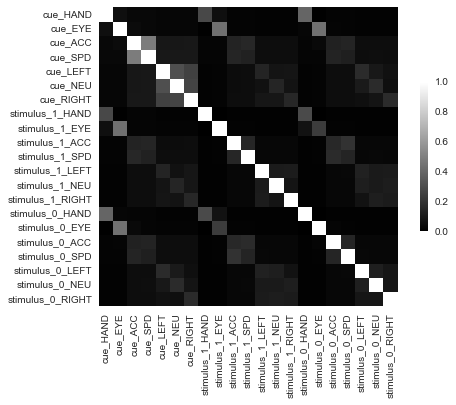

In [92]:
import seaborn as sns

corr = np.abs(pd.DataFrame(X[:,1:], columns=ev_names).corr())
sns.heatmap(corr, vmax=1, vmin=0, center=.5, cmap='gray',
            square=True, linewidths=0.00, cbar_kws={"shrink": .5})

In [107]:
X.shape

(46148, 22)

In [143]:
c = np.array([[0] + [0] * 7 + [1] * 14,  # Stimulus
              [0] + [1] * 7 + [0] * 14,  # Cue
              [0] + [0] * 7 + [1] * 7 + [0] * 7], # Left vs right stim
            )
# Also include every EV against baseline
c = np.vstack((np.hstack((np.zeros(shape=(21,1)), np.eye(21))).astype(int),
              c))
#               [0, 0, 0, 0, 0, 1, 0, 0, 0],  # Speed cue
#               [0, 0, 0, 0, 1, 0, 0, 0, 0],  # Acc cue
#               [0, 0, 0, 0, 0, 0, 1, 0, 0],  # Left cue
#               [0, 0, 0, 0, 0, 0, 0, 1, 0],  # Right cue
#               [0, 0, 0, 0, 0, 0, 0, 0, 1],  # EYE cue
#               [0, 0, 1, 0, 0, 0, 0, 0, 0],  # HAND cue
#               [0, 0, 0, 1, 0, 0, 0, 0, 0]])

dvars = [(c[i, :].dot(np.linalg.pinv(X.T.dot(X))).dot(c[i, :].T))
                for i in range(c.shape[0])]

pprint(dvars)
eff = c.shape[0] / np.sum(dvars) # take the inverse of the summed design variances (1/sum(dvars))
pprint(eff)

pprint(c)

[0.00069222312859546159,
 0.00092091821932616114,
 4.577176590698089e-06,
 4.5966719276183881e-06,
 5.2133978712173922e-06,
 5.1305658516537184e-06,
 5.3359554931711791e-06,
 0.00037864348801237082,
 0.00056740309036504288,
 3.3680690422811122e-05,
 3.4454832486950759e-05,
 4.2211513156518268e-05,
 4.3329020383006777e-05,
 4.4153499072407399e-05,
 0.00041491014857489246,
 0.00055726915633054854,
 3.3950572414958293e-05,
 3.4079973989344266e-05,
 4.2420957433375471e-05,
 4.2930133818395774e-05,
 4.3633933726450034e-05,
 0.0055088227438417209,
 0.001965681588817594,
 0.0016515321987157776]
1835.2689146133418
array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 

Processing participant 1
Convolving cue_HAND...
Convolving cue_EYE...
Convolving cue_ACC...
Convolving cue_SPD...
Convolving cue_NEU...
Convolving cue_RIGHT...
Convolving cue_LEFT...
Convolving stimulus_1_HAND...
Convolving stimulus_1_EYE...
Convolving stimulus_1_ACC...
Convolving stimulus_1_SPD...
Convolving stimulus_1_NEU...
Convolving stimulus_1_RIGHT...
Convolving stimulus_1_LEFT...
Convolving stimulus_0_HAND...
Convolving stimulus_0_EYE...
Convolving stimulus_0_ACC...
Convolving stimulus_0_SPD...
Convolving stimulus_0_NEU...
Convolving stimulus_0_RIGHT...
Convolving stimulus_0_LEFT...


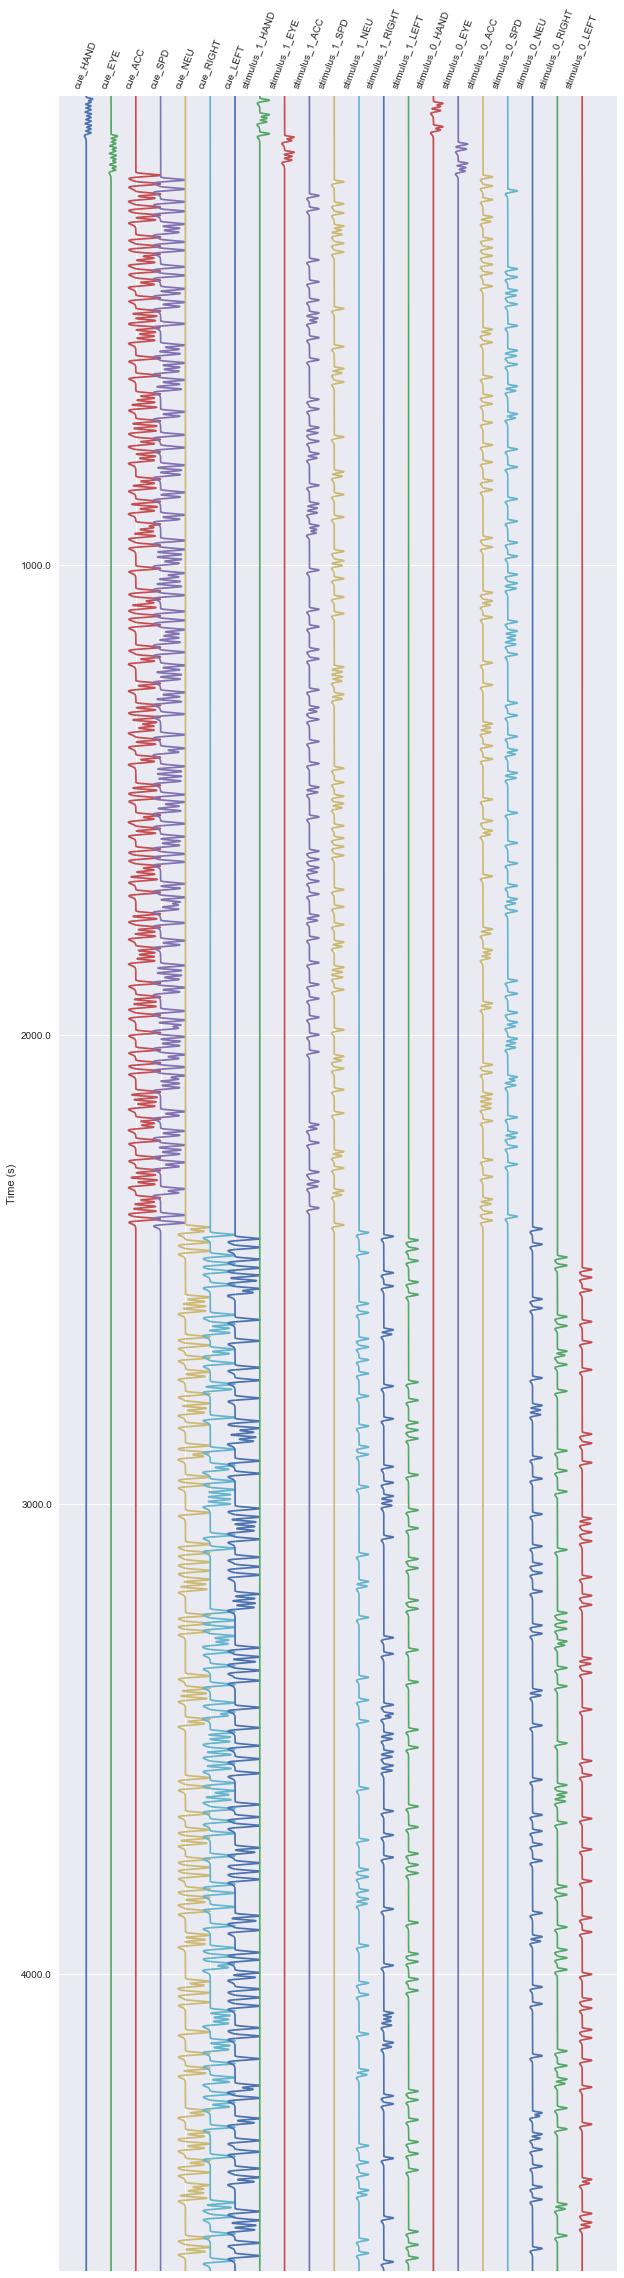

In [106]:
for pp in range(1, 2):
    print('Processing participant %d' % pp)
    pp_num = str(pp).zfill(3)
    stim_info = pd.read_csv('pp_%s_trial_types_full.csv' % pp_num)
    stim_info = stim_info[['trial_type', 'correct_answer', 'block', 'phase_2', 'phase_4', 'cue', 'cue_onset_time', 'stimulus_onset_time']]
    
    plot_participant_design(stim_info, pp)

## To .txts file for FSL

In [105]:
stim_info = pd.read_csv('pp_001_trial_types_full.csv')
stim_info = stim_info[['correct_answer','trial_type', 'block', 'phase_2', 'phase_4', 'cue', 'cue_onset_time', 'stimulus_onset_time', 'response_modality']]

n_evs = 1

stim_info['last_col'] = 1
for cue_type in stim_info['cue'].unique():
    ev = stim_info.loc[(stim_info['cue'] == cue_type), ['cue_onset_time', 'phase_2', 'last_col']].values.tolist()
    
    with open('pp_001_evs/ev_cue_%s.txt' % cue_type, 'wb') as f:
        for _list in ev:
            for _string in _list:
                f.write(str(_string) + '\n')
            f.write('\n')

for stim_type in stim_info['correct_answer'].unique():
    
    for cue_type in stim_info['cue'].unique():
        ev = stim_info.loc[(stim_info['correct_answer'] == stim_type) &
                           (stim_info['cue'] == cue_type), 
                           ['stimulus_onset_time', 'phase_2', 'last_col']].values.tolist()

        with open('pp_001_evs/ev_stimulus_%d_%s.txt' % (stim_type, cue_type), 'wb') as f:
            for _list in ev:
                for _string in _list:
                    f.write(str(_string) + '\n')
                f.write('\n')



# for block_n in stim_info['block'].unique():
#     this_block = stim_info.loc[stim_info['block'] == block_n, ['cue', 'correct_answer', 'cue_onset_time', 'phase_2', 'response_modality']]
#     this_block['lastcol'] = 1
#     response_modality = this_block['response_modality'].values[0]

#     for cue in this_block['cue'].unique():

#         for correct_answer in this_block['correct_answer'].unique():
#             ev = this_block.loc[(this_block['cue'] == cue) & 
#                                 (this_block['correct_answer'] == correct_answer), 
#                                 ['cue_onset_time', 'phase_2', 'lastcol']].values.tolist()
#             with open('pp_001_evs/ev%d.txt' % n_evs, 'wb') as f:
#                 for _list in ev:
#                     for _string in _list:
#                         f.write(str(_string) + '\n')
#                     f.write('\n')
            
#             if n_evs == 1:
#                 open_type = 'wb'
#             else:
#                 open_type = 'a'

#             with open('pp_001_evs/event_types.txt', open_type) as f:
#                 f.write('ev %d\nCue: %s, correct answer: %d, response modality: %s\n\n' % (n_evs, cue, correct_answer, response_modality))

#             n_evs += 1
# ev1 = this_block.loc[(this_block['cue'] == 'EYE') & (this_block['correct_answer']==1), ['cue_onset_time', 'phase_2']].values.tolist()
# ev2 = this_block.loc[(this_block['cue'] == 'EYE') & (this_block['correct_answer']==1), ['cue_onset_time', 'phase_2']].values.tolist()
# # for row in this_block.iterrows:
# #     if row['cue'] == 'EYE' and row['correct_answer'] == 1:
        

###### The following didnt work...

/Users/steven/anaconda/envs/subcortex/lib/python2.7/site-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in exp
  """
/Users/steven/anaconda/envs/subcortex/lib/python2.7/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in multiply
  """


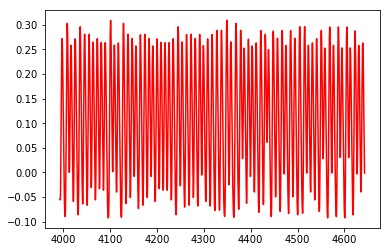

In [14]:
from nipy.modalities.fmri.utils import events, Symbol, lambdify_t
from nipy.modalities.fmri.hrf import glover
import pylab

max_t = int(stim_info['stimulus_onset_time'].max()+10)

onsets = stim_info['stimulus_onset_time'].values
evs = events(times=onsets, f=hrf.glover)

# Real valued function for symbolic events
real_evs = lambdify_t(evs)

# Time points at which to sample
t_samples = np.linspace(0, max_t, max_t*10)

pylab.plot(t_samples, real_evs(t_samples), c='r')
# for onset  in onsets:
#     pylab.plot(onset, 0, c='b')

pylab.show()
